# Student Performance Indicator
## Life cycle of Machine learning Project

    Defining the problem statement
    Data collection
    Data validation
    Exploratory data analysis
    Data pre-processing
    Model training & evaluation
    Choosing the best model

### 1) Problem statement

    This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

### 2) Data Collection

    Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
    The data consists of 8 column and 1000 rows.

## Import relevant libraries

In [62]:
!pip install catboost xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.1/98.1 MB 3.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 6.0 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 6.3 MB/s eta 0:00:0000:0100:01


In [63]:
# For EDA and analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Modeling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

## Importing data & validation

In [27]:
students = pd.read_csv('stud.csv')

In [28]:
# Look at first few rows
students.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [29]:
students.shape

(1000, 8)

In [30]:
students.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [31]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [32]:
# check for duplicate rows
students.duplicated().sum()

0

In [33]:
students.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [34]:
# Print unique values of categorical variables
for col in students.iloc[:,:5].columns:
    print(f"Unique values in column {col}: \n {students[col].unique()}")

Unique values in column gender: 
 ['female' 'male']
Unique values in column race_ethnicity: 
 ['group B' 'group C' 'group A' 'group D' 'group E']
Unique values in column parental_level_of_education: 
 ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Unique values in column lunch: 
 ['standard' 'free/reduced']
Unique values in column test_preparation_course: 
 ['none' 'completed']


## EDA

In [35]:
# gather categorical and numerical features
numerical_features = [col for col in students.columns if students[col].dtype != 'O']
categorical_features = [col for col in students.columns if students[col].dtype == 'O']

print(f"we have {len(numerical_features)} numerical features: {numerical_features}")
print(f"we have {len(categorical_features)} categorical features: {categorical_features}")

we have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
we have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [36]:
# calculating total and average scores
students['total'] = students.math_score + students.reading_score + students.writing_score
students['average'] = round(students.total/3,2)

In [37]:
students.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [23]:
print(f"Number of Students with perfect maths score: {df[df.math_score == 100]['average'].count()}")
print(f"Number of Students with perfect reading score: {df[df.reading_score == 100]['average'].count()}")
print(f"Number of Students with perfect writing score: {df[df.writing_score == 100]['average'].count()}")
print(f"Number of Students with perfect total score: {df[df.total == 300]['average'].count()}")

Number of Students with perfect maths score: 7
Number of Students with perfect reading score: 17
Number of Students with perfect writing score: 14
Number of Students with perfect total score: 3


### Visualizations
#### Visualize average score distribution to make some conclusion.

    Histogram
    Kernel Distribution Function (KDE)

#### Histogram & KDE

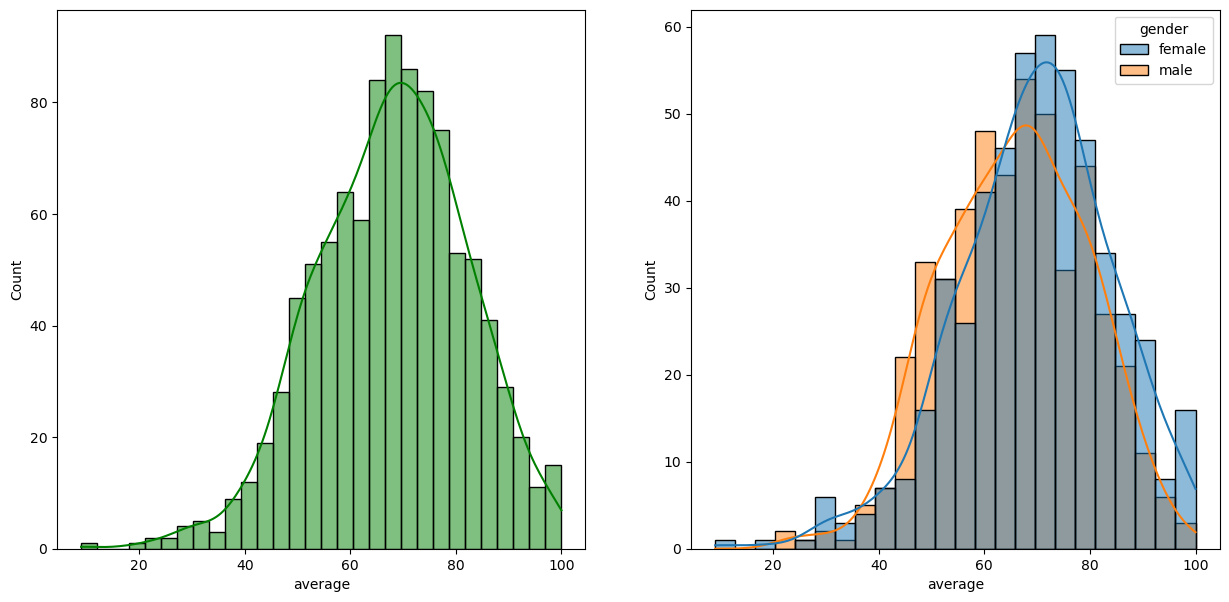

In [38]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=students,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=students,x='average',kde=True,hue='gender')
plt.show()

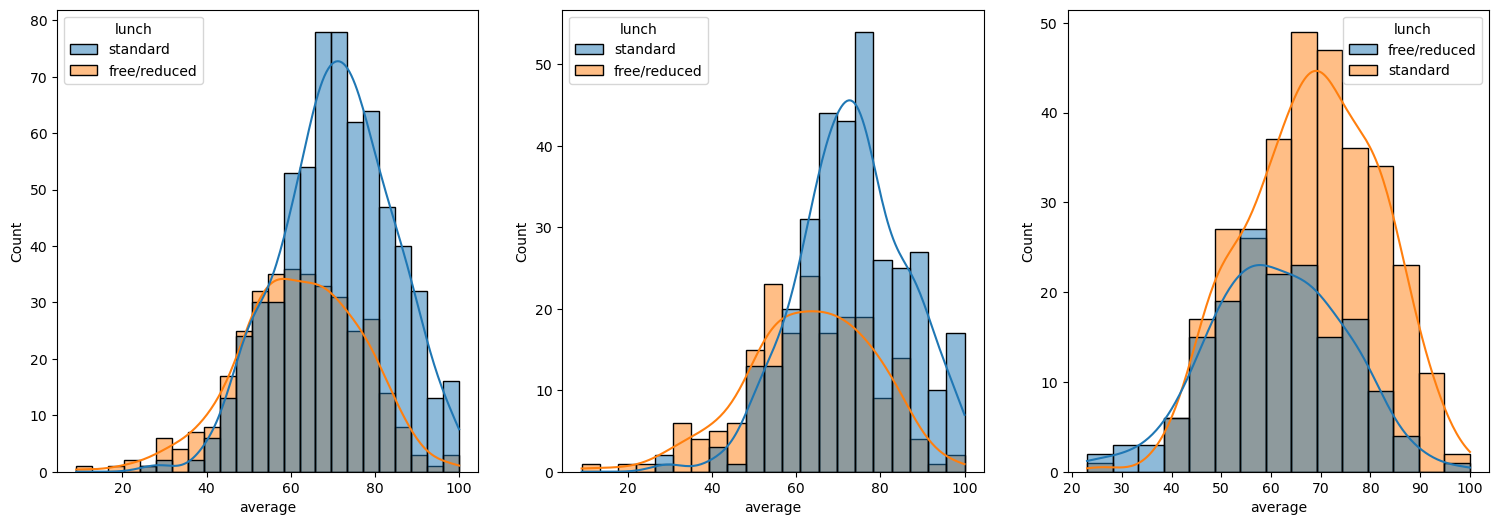

In [40]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=students,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=students[students.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=students[students.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

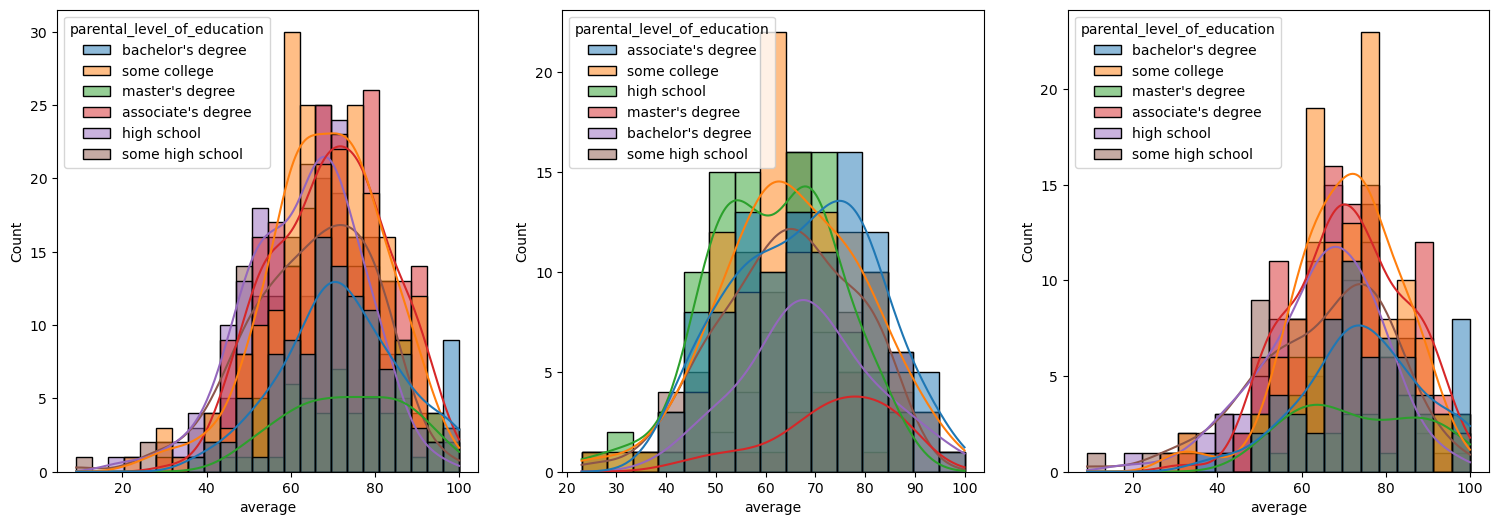

In [43]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=students,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=students[students.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=students[students.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

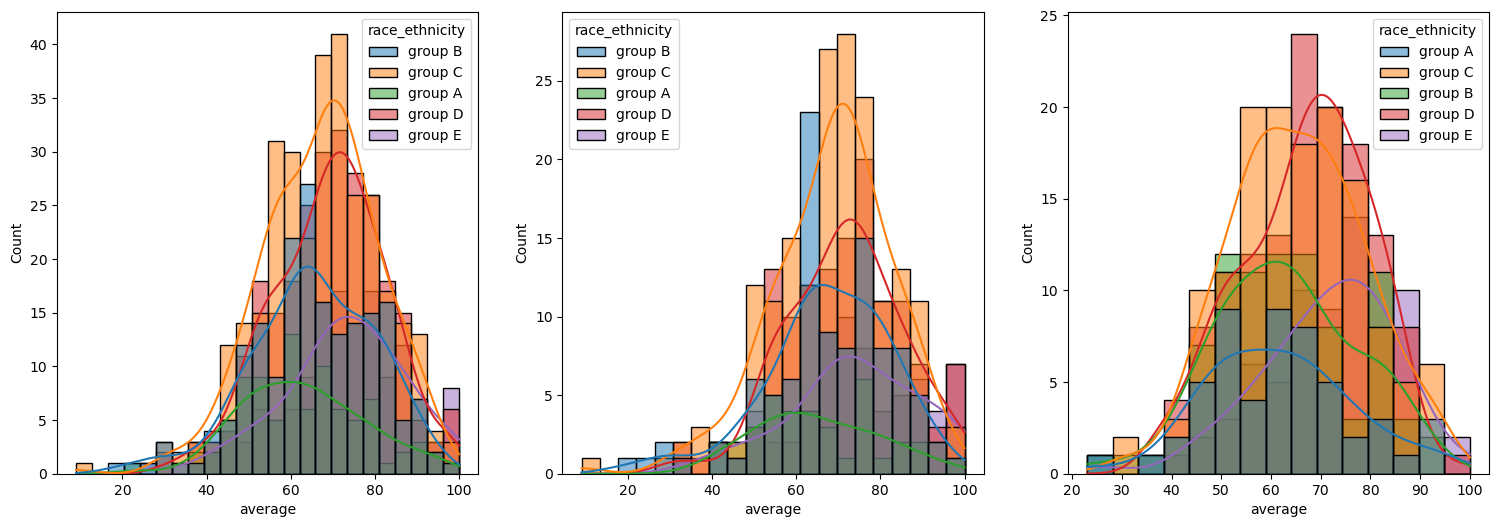

In [45]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=students,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=students[students.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=students[students.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

## EDA using specific feature analysis

#### What is distribution of Gender? 

In [48]:
students.gender.value_counts()

gender
female    518
male      482
Name: count, dtype: int64

#### Does gender have any correlation with student's performance?

In [52]:
students.groupby('gender')[numerical_features].mean()

,math_score,reading_score,writing_score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


#### What is the distribution of race and ethnicity?

In [53]:
students.race_ethnicity.value_counts()

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

#### Does race and ethnicity have any visible impact on scores?

In [54]:
students.groupby('race_ethnicity')[numerical_features].mean()

,math_score,reading_score,writing_score
race_ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


#### What is the distribution of parental level of education?

In [55]:
students.parental_level_of_education.value_counts()

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

#### Does parental level of education have any visible impact on scores?

In [56]:
students.groupby('parental_level_of_education')[numerical_features].mean()

,math_score,reading_score,writing_score
parental_level_of_education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


#### What is the distribution of lunch?

In [57]:
students.lunch.value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

#### Does lunch type have any visible impact on scores?

In [58]:
students.groupby('parental_level_of_education')[numerical_features].mean()

,math_score,reading_score,writing_score
parental_level_of_education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


#### What is the distribution of test preparation course?

In [59]:
students.test_preparation_course.value_counts()

test_preparation_course
none         642
completed    358
Name: count, dtype: int64

#### Does test preparation course have any visible impact on scores?

In [60]:
students.groupby('test_preparation_course')[numerical_features].mean()

,math_score,reading_score,writing_score
test_preparation_course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


## Model creation and evaluation

Let's build the model to predict math scores

In [64]:
# create two dfs to capture dependent and the independent variables
X = students.drop(columns = 'math_score', axis=1)
y = students.math_score

In [65]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score,total,average
0,female,group B,bachelor's degree,standard,none,72,74,218,72.67
1,female,group C,some college,standard,completed,90,88,247,82.33
2,female,group B,master's degree,standard,none,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,57,44,148,49.33
4,male,group C,some college,standard,none,78,75,229,76.33


In [66]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [71]:
# Transform numerical and categorical features
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_transformer = StandardScaler()
cat_transformer = OneHotEncoder()
numerical_features.remove('math_score')

# instantiate a preprocessor pipeline
preprocessor = ColumnTransformer([
("OneHotEncoder", cat_transformer, categorical_features),
("StandardScaler", num_transformer, numerical_features)
])

In [72]:
X = preprocessor.fit_transform(X)

In [73]:
X.shape

(1000, 19)

In [74]:
# split data into test train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [75]:
# Create an Evaluation Function

def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

### Building baseline models i.e. no hyperparameter tuning yet

In [76]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for key, value in models.items():
    model = value
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(key)
    model_list.append(key)
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3257
- Mean Absolute Error: 4.2698
- R2 Score: 0.8742
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4212
- Mean Absolute Error: 4.2345
- R2 Score: 0.8792


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7079
- Mean Absolute Error: 4.5168
- R2 Score: 0.8555
-----------------------

In [77]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.879222
7,CatBoosting Regressor,0.851632
5,Random Forest Regressor,0.849540
8,AdaBoost Regressor,0.847650
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.741142


Based on the results above we pick Linear regressor

 Accuracy of the model is 87.92


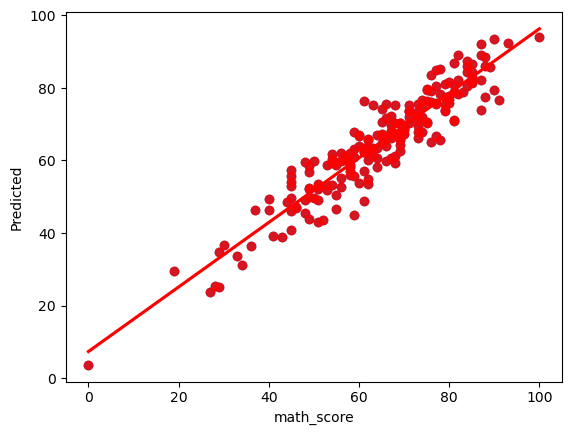

In [79]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');